# Austin Reed

### Subsetting: Calculate climatology and anomaly for a lat/lon point within the Sahel region

Lat/lon point of interest: 15N, 10E #Sahel region

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import NaturalEarthFeature
from cartopy.feature import COASTLINE
from clim680_function import xyticks

In [2]:
f= '/scratch/areed29/ERA5data/*.nc' #loads in Netcdf ERA5data
DS1 = xr.open_mfdataset(f) #opens the file
#print(DS1)
data_lat= DS1.latitude.values #latitude array
data_lon= DS1.longitude.values #longitude array
nlats = len(data_lat[:]) #length of latitude array
nlons = len(data_lon[:]) #length of longitude array
time = DS1.time #time array
ds_mean = DS1.mean(dim=('expver')) # average over the expver variable (axis 1) to get rid of it for now and get a 3D array of time,lat,lon
total_cloud_cover = ds_mean.tcc #total cloud cover
total_precip= ds_mean.tp #total precipitation
column_cloud_wv = ds_mean.tcwv #total column cloud liquid water

In [4]:
ds_sahel = ds_mean.sel(latitude=15, longitude=10, method= 'nearest')
ds_climo = ds_mean.groupby('time.month').mean(dim='time') # Calculates the climatology
pt_ds_climo = ds_climo.sel(latitude =15, longitude = 10, method = 'nearest') #Select the climo for Sahel region
ds_pt_1979 = ds_sahel.sel(time= slice('1979-01-01', '1979-12-01')) #select 1979 data for Sahel
ds_pt_2020 = ds_sahel.sel(time= slice('2020-01-01','2020-12-01')) #select 2020 data for Sahel
ds_anoms = ds_mean.groupby('time.month') -ds_climo #calculates the anomaly 
print(ds_anoms)
ds_anomspt = ds_anoms.sel(latitude=15, longitude = 10, method = 'nearest') # Select the anomaly for Sahel 

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 43 times more chunks
  return self.array[key]
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 43 times more chunks
  return self.array[key]
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 43 times more chunks
  return self.array[key]
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 43 times more chunks
  return self.array[key]
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 43 tim

<xarray.Dataset>
Dimensions:    (latitude: 401, longitude: 241, time: 513)
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-09-01
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 11 12 1 2 3 4 5 6 7 8 9
Data variables: (12/34)
    cbh        (time, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    cp         (time, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    crr        (time, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    hcc        (time, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    ilspf      (time, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    lsm        (time, latitude, longitude) float32 das

### A climatology time series for Sahel region

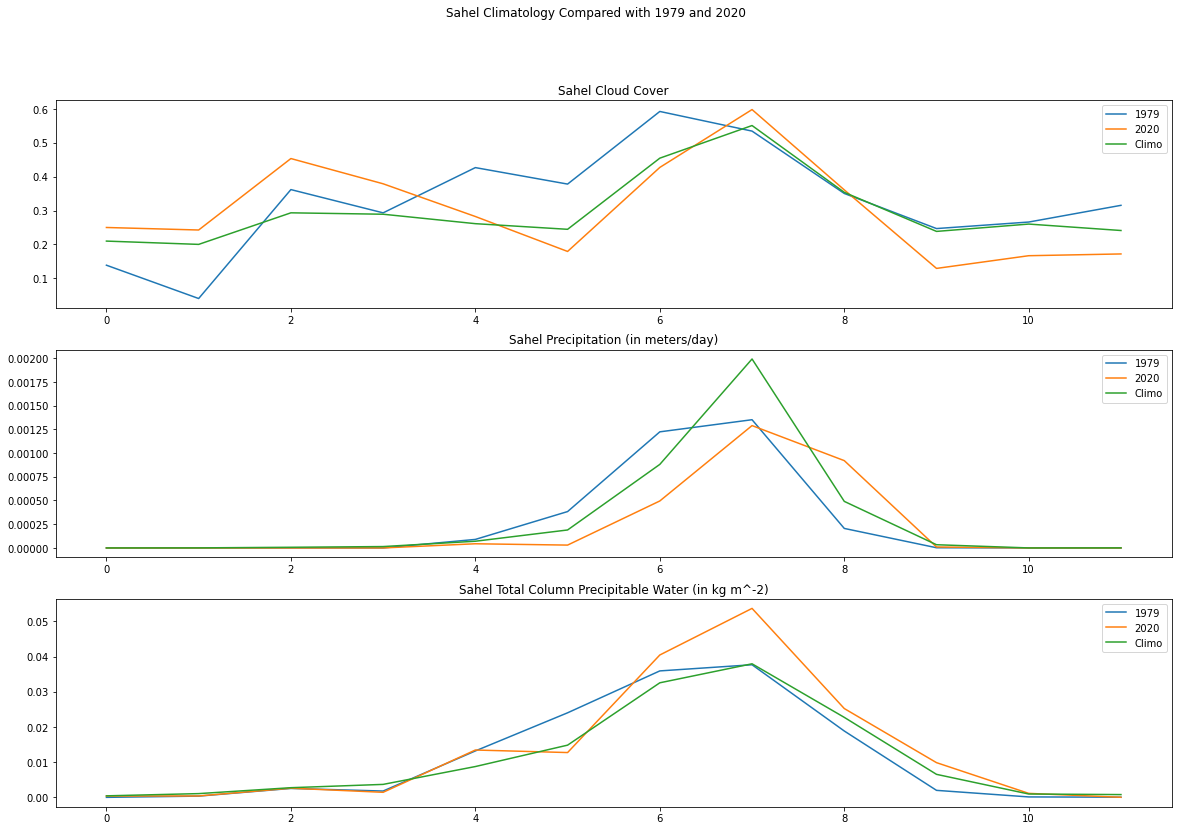

In [5]:
fig = plt.figure(figsize=(20,13))
# Set height padding for plots
fig.set_constrained_layout_pads(w_pad=0., h_pad=0.1, hspace=0., wspace=0.)
#First plot: Total Cloud Cover
ax_cloudcover = fig.add_subplot(3,1,1)
ax_cloudcover.plot(ds_pt_1979['tcc'])
ax_cloudcover.plot(ds_pt_2020['tcc'])
ax_cloudcover.plot(pt_ds_climo['tcc'])
ax_cloudcover.set_title('Sahel Cloud Cover') 
ax_cloudcover.legend(['1979','2020', 'Climo'])
#Second plot: Total Precip
ax_precip = fig.add_subplot(3,1,2)
ax_precip.plot(ds_pt_1979['tp'])
ax_precip.plot(ds_pt_2020['tp'])
ax_precip.plot(pt_ds_climo['tp'])
ax_precip.set_title('Sahel Precipitation (in meters/day)') 
ax_precip.legend(['1979','2020', 'Climo'])
#Third plot: Total Column Precipitable Water
ax_lw = fig.add_subplot(3,1,3)
ax_lw.plot(ds_pt_1979['tclw'])
ax_lw.plot(ds_pt_2020['tclw'])
ax_lw.plot(pt_ds_climo['tclw'])
ax_lw.set_title('Sahel Total Column Precipitable Water (in kg m^-2)') 
ax_lw.legend(['1979','2020', 'Climo'])
plt.suptitle('Sahel Climatology Compared with 1979 and 2020')
plt.savefig('/homes/areed29/CLIM680_Fall2021/final_project/figures/Sahel_climo')

### An anomaly time series for Sahel region

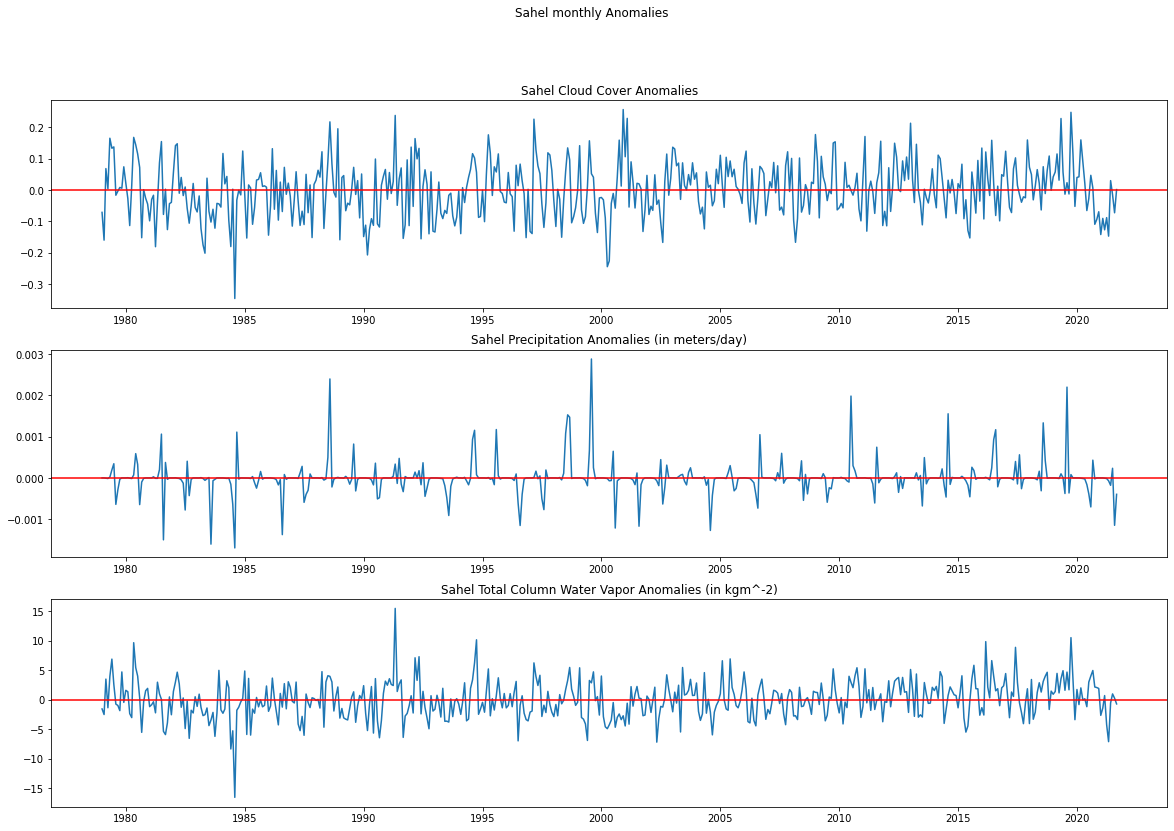

In [6]:
fig = plt.figure(figsize=(20,13))
# Set height padding for plots
fig.set_constrained_layout_pads(w_pad=0., h_pad=0.1, hspace=0., wspace=0.)
#First plot: Total Cloud Cover
ax_cloudcover = fig.add_subplot(3,1,1)
ax_cloudcover.plot(ds_anomspt['time'],ds_anomspt['tcc'])
ax_cloudcover.axhline(y=0.0, color='r', linestyle='-')
ax_cloudcover.set_title('Sahel Cloud Cover Anomalies') 
#Second plot: Total Precip
ax_precip = fig.add_subplot(3,1,2)
ax_precip.plot(ds_anomspt['time'], ds_anomspt['tp'])
ax_precip.axhline(y=0.0, color='r', linestyle='-')
ax_precip.set_title('Sahel Precipitation Anomalies (in meters/day)') 
#Fourth plot: Total Column Cloud Water Vapor
ax_wv = fig.add_subplot(3,1,3)
ax_wv.plot(ds_anomspt['time'],ds_anomspt['tcwv'])
ax_wv.axhline(y=0.0, color='r', linestyle='-')
ax_wv.set_title('Sahel Total Column Water Vapor Anomalies (in kgm^-2)') 
plt.suptitle('Sahel monthly Anomalies')
plt.savefig('/homes/areed29/CLIM680_Fall2021/final_project/figures/Sahel_anoms')

### Fit a line to each anomaly time series (employing regression)

In [10]:
from scipy.stats import linregress

In [11]:
x_values = np.linspace(0,1,len(ds_anomspt['time']))
#Cloud cover
[m_fit_clouds,b_fit_clouds]=np.polyfit(x_values,ds_anomspt['tcc'],1)
print(b_fit_clouds,m_fit_clouds)
y_fit_clouds = m_fit_clouds*x_values+b_fit_clouds
#total precipitation
[m_fit_precip,b_fit_precip]=np.polyfit(x_values,ds_anomspt['tp'],1)
print(b_fit_precip,m_fit_precip)
y_fit_precip = m_fit_precip*x_values+b_fit_precip
#precipitable water
[m_fit_tcwv,b_fit_tcwv]=np.polyfit(x_values,ds_anomspt['tp'],1)
print(b_fit_tcwv,m_fit_tcwv)
y_fit_tcwv = m_fit_tcwv*x_values+b_fit_tcwv

-0.01696400440961874 0.033927992378580095
-3.5284050411012675e-05 7.056807616768829e-05
-3.5284050411012675e-05 7.056807616768829e-05


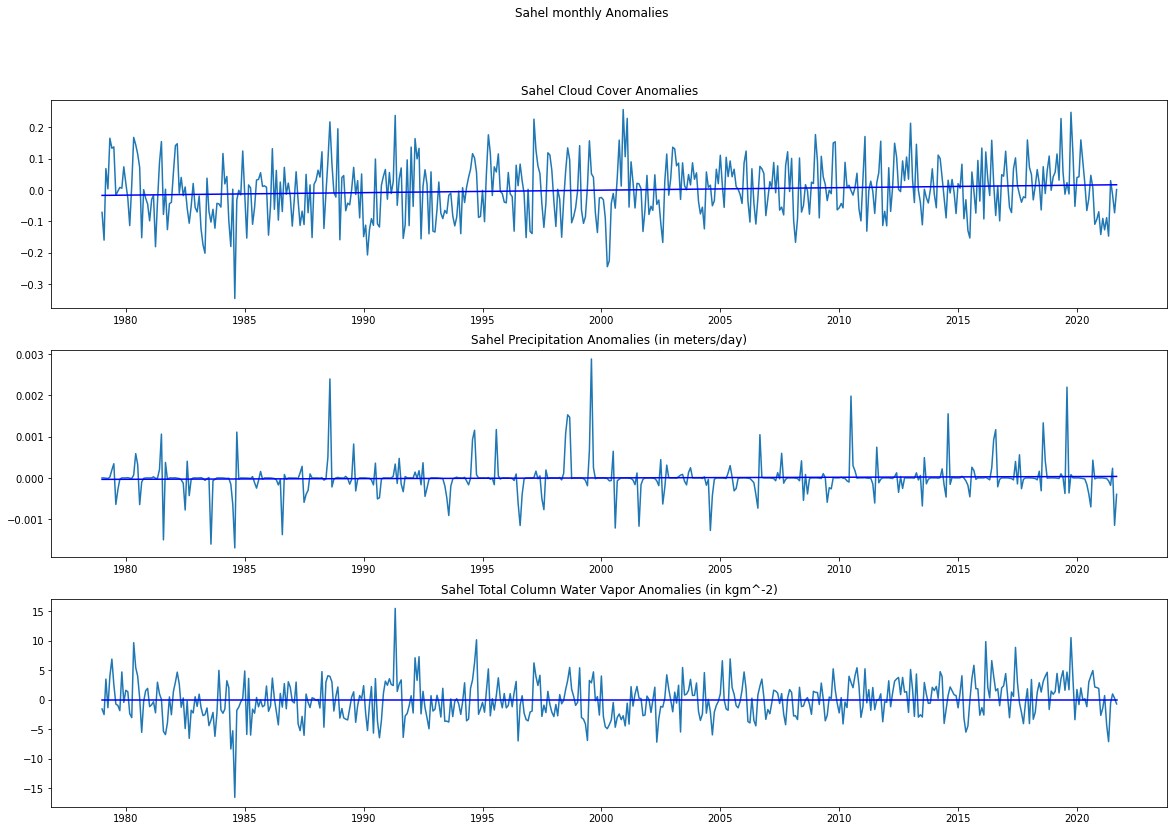

In [14]:
fig = plt.figure(figsize=(20,13))
# Set height padding for plots
fig.set_constrained_layout_pads(w_pad=0., h_pad=0.1, hspace=0., wspace=0.)
#First plot: Total Cloud Cover
ax_cloudcover = fig.add_subplot(3,1,1)
ax_cloudcover.plot(ds_anomspt['time'],ds_anomspt['tcc'])
ax_cloudcover.plot(ds_anomspt['time'],y_fit_clouds,'b-')
#ax_cloudcover.axhline(y=0.0, color='r', linestyle='-')
ax_cloudcover.set_title('Sahel Cloud Cover Anomalies') 
#Second plot: Total Precip
ax_precip = fig.add_subplot(3,1,2)
ax_precip.plot(ds_anomspt['time'], ds_anomspt['tp'])
ax_precip.plot(ds_anomspt['time'],y_fit_precip,'b-')
#ax_precip.axhline(y=0.0, color='r', linestyle='-')
ax_precip.set_title('Sahel Precipitation Anomalies (in meters/day)') 
#Fourth plot: Total Column Cloud Water Vapor
ax_wv = fig.add_subplot(3,1,3)
ax_wv.plot(ds_anomspt['time'],ds_anomspt['tcwv'])
ax_wv.plot(ds_anomspt['time'],y_fit_tcwv,'b-')
#ax_wv.axhline(y=0.0, color='r', linestyle='-')
ax_wv.set_title('Sahel Total Column Water Vapor Anomalies (in kgm^-2)') 
plt.suptitle('Sahel monthly Anomalies')
plt.savefig('/homes/areed29/CLIM680_Fall2021/final_project/figures/Sahel_anoms')
#Note: the horizontal line centered at 0 is removed in order to visualize the best-fit trend line